# Part 1: Descriptive Statistics and Data Exploration

## What is data?

- Data is information
- Everything around us is or can become data

## Types of data

- Quantitative
    - Discrete
    - Continuous
- Categorical
    - Nominal
    - Ordinal

## Descriptive statistics
- help understand and describe data
- first step of any data analysis

## Measures of Central Tendency - what's "typical"?

Example: we have the ages of five people:  ages = [25, 30, 28, 32, 27]

### Mean - the average

sum up all the values and divide by their number
sum(ages)/len(ages) = 142/5 = 28.4

- uses all data points equally
- great for symmetrical data without extereme values
- what happens when one person in the group is 95?
 
    -> very sensitive to outliers

In [6]:
import numpy as np
ages = [25, 30, 28, 32, 27]
np.mean(ages)

np.float64(28.4)

### Median - the middle value
- sort the data from smallest to largest and take the middle value
- if the number of datapoints is even, take the average between the two middle ones

remember ages = [25, 30, 28, 32, 27]

sorted_ages = [25, 27, 28, 30, 32]

median is 28

- what happens if one person is 90?

  -> not sensitive to outliers

- we can also take the values at other lines through the data: 0.25 and 0.75 are called quartiles; other lines percentiles

In [7]:
np.median(ages)

np.float64(28.0)

### Mode - the most frequent

- the value that appears most frequently in the data
- usecase: categorical data
    - there is no mean or median (no 'average' favourite color)
    - but there is a most common value
- data can be unimodal, multimodal or no mode
- example:
    - favourite colors: [red, blue, green, red, yellow, blue, red]
    - mode is red

In [8]:
np.mode(ages)

AttributeError: module 'numpy' has no attribute 'mode'

Whoops! Looks like numpy doesn't implement mode.

That's because numpy is for numerical operations. But we still have pandas!

In [2]:
import pandas as pd

ages = [25, 30, 28, 32, 27]
df = pd.DataFrame({'age': ages})
df.age.mode()

0    25
1    27
2    28
3    30
4    32
Name: age, dtype: int64

In [3]:
# using a bigger dataset
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris['data']

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.columns = ['s_length', 's_width', 'p_length', 'p_width']
df['target'] = iris['target']

In [6]:
df.groupby('target').s_length.mean()

target
0    5.006
1    5.936
2    6.588
Name: s_length, dtype: float64

In [10]:
df.groupby('target').p_length.median()

target
0    1.50
1    4.35
2    5.55
Name: p_length, dtype: float64

In [13]:
df.groupby('target').p_width.agg(lambda x: x.mode().to_list())

target
0    [0.2]
1    [1.3]
2    [1.8]
Name: p_width, dtype: object

## 1.3 Measures of Variability/Spread (15 minutes)

### Range - simple, but limited
- difference between min and max in the dataset
- ages = [25, 30, 28, 32, 27]
    - max = 32
    - min = 25
    - range = 7
- if we include 90, range jumps to 65

In [24]:
df.s_length.max() - df.s_length.min()

np.float64(3.6000000000000005)

In [14]:
df.groupby('target').agg(lambda x: x.max() - x.min())

,s_length,s_width,p_length,p_width
target,,,,
0,1.5,2.1,0.9,0.5
1,2.1,1.4,2.1,0.8
2,3.0,1.6,2.4,1.1


### Interquartile Range (IQR) - robust spread

New terms:
- quartile: 25% of the data
- xth percentile: x% of the data
- 1st quartile is equal to 25th percentile
- 2nd quartile is equal to 50th percentile is equal to median
- 3rd quartile is equal to 75th percentile

#### IQR

- range between the 25th and 75th percentile
- ignores the extreme 25% on both ends
- range of the middle 50% of the data

In [16]:
quartiles = df.s_length.quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
iqr

np.float64(1.3000000000000007)

In [23]:
df.groupby('target').s_length.agg(lambda x: x.quantile(0.75) - x.quantile(0.25))

target
0    0.400
1    0.700
2    0.675
Name: s_length, dtype: float64

### Variance and Standard Deviation

- intuition: imagine every data point as a person; variance and std tell us how much they deviate from their home (mean)

- Variance: calculates the average of the squared differences from the mean
    - square the differences so that negative and positive deviations don't cancel each other out
    - gives us a sense of the average squared spread

- Standard Deviation (σ): square root of the variance
    - brings the value back to the original scale of the data
    - easier to interpret
    - small std: data points are close to the mean, large std: datapoints are widely scattered

- Average heigt is 170 cm with a standard deviation of 5 cm. How tall are most people?

In [24]:
df.s_length.std()

np.float64(0.828066127977863)

In [25]:
df.describe()

,s_length,s_width,p_length,p_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Historgram

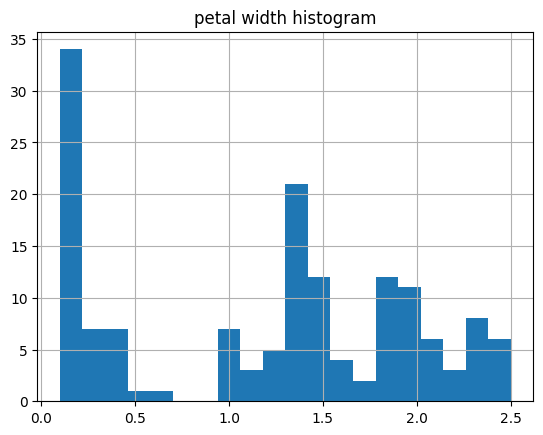

In [26]:
import matplotlib.pyplot as plt
df.p_width.hist(bins=20)
_ = plt.title('petal width histogram')

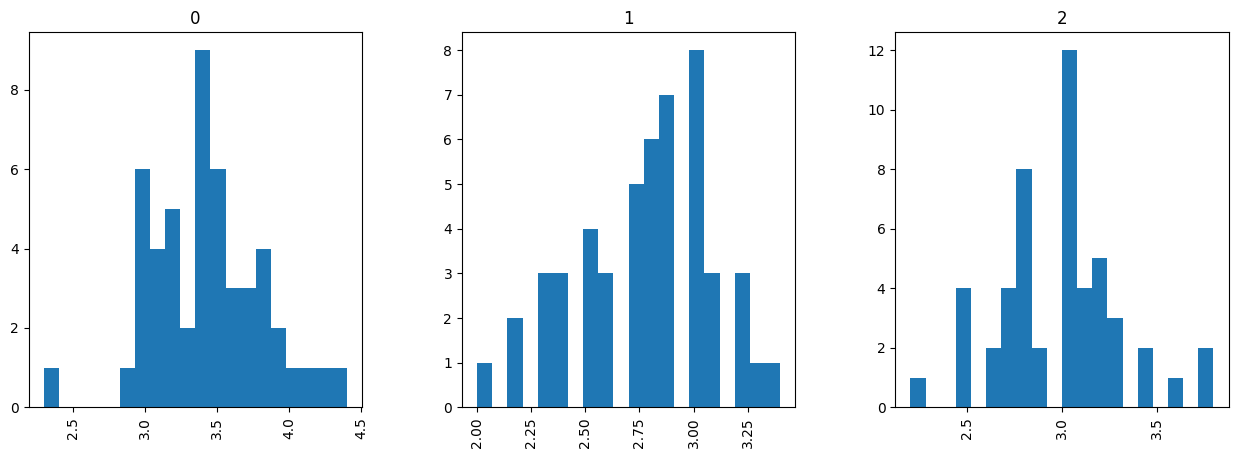

In [36]:
_ = df.hist(column='s_width', by='target', bins=20, layout=(1,3), figsize=(15,5))

## Box Plot

<Axes: >

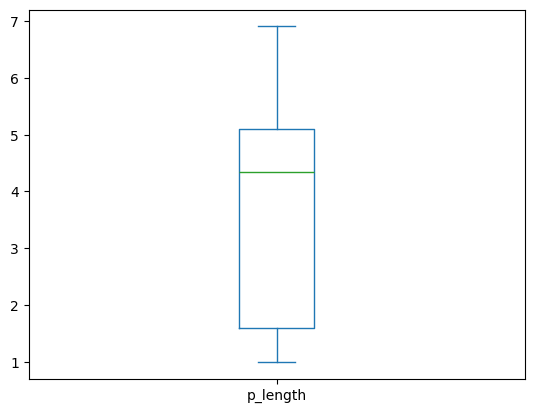

In [37]:
df.p_length.plot(kind='box')

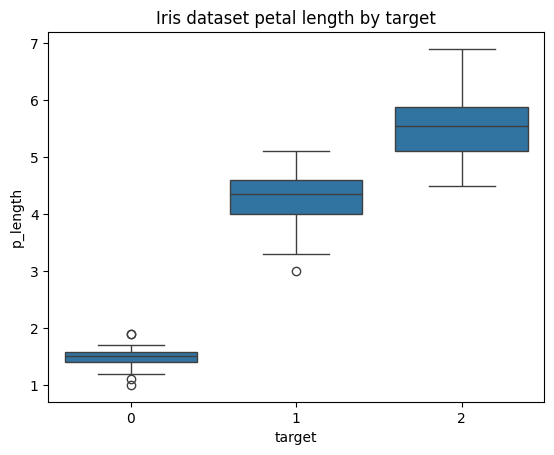

In [38]:
import seaborn as sns
sns.boxplot(x='target', y='p_length', data=df)
_ = plt.title('Iris dataset petal length by target')

## Bar Chart

<Axes: xlabel='s_width'>

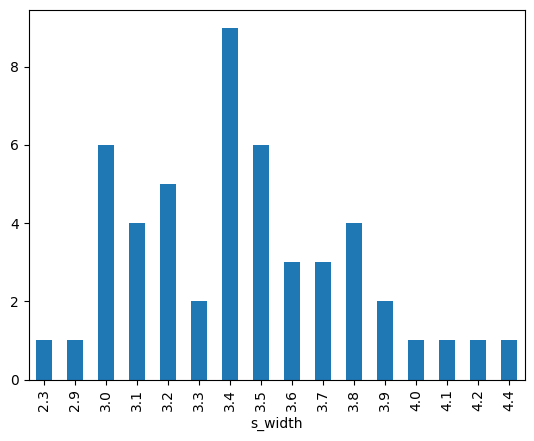

In [40]:
df[df.target==0].s_width.value_counts().sort_index().plot.bar()

## Scatter Plot

<Axes: xlabel='p_width', ylabel='p_length'>

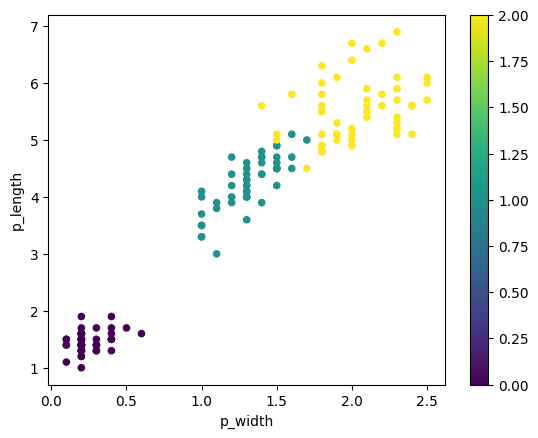

In [46]:
df.plot.scatter(x='p_width', y='p_length', c=df.target, colormap='viridis')

## Recap
- quantitative and categorical data
- measures of 'typical' values (mean, median, mode)
- measures of 'spread' (range, variance, std, IQR)
- visualising data with histograms, box plots, bar charts, scater plots
- key takeaway: always start by understanding your data!

## Questions?